<a href="https://colab.research.google.com/github/DaniBntz/Telecom-X--2/blob/main/telecomx_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este proyecto se utiliza una base de datos de Telecom X, que contiene información sobre clientes, suscripciones y servicios. El objetivo principal es realizar un análisis exploratorio de datos (EDA) para identificar patrones de comportamiento y las causas más comunes de cancelación del servicio.

Se aplican técnicas de limpieza, transformación, visualización y análisis estadístico, enfocándose en variables como tipo de suscripción, uso de servicios y satisfacción del cliente.

A partir de los hallazgos del análisis exploratorio, se desarrolla un modelo de Machine Learning que permite predecir la probabilidad de abandono del servicio, utilizando las características y patrones de uso de los clientes. El propósito final es anticipar la pérdida de clientes y apoyar la toma de decisiones estratégicas.

## Diccionario de variables
- Cancelación: si el cliente dejó o no la empresa
- Genero: género (masculino y femenino)
- Jubilado: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Pareja: si el cliente tiene o no una pareja
- Dependientes: si el cliente tiene o no dependientes
- Meses_contrato: meses de contrato del cliente
- Servicio_telefonico: suscripción al servicio telefónico
- Multiples_lineas: suscripción a más de una línea telefónica
- DSL: suscripción a un proveedor de internet (tipo)
- Fibra_Optica: suscripción a un proveedor de internet (tipo)
- Seguridad_Ol: suscripción adicional de seguridad en línea
- Backup_Ol: suscripción adicional de respaldo en línea
- Proteccion_dispositivo: suscripción adicional de protección del dispositivo
- Soporte técnico: suscripción adicional de soporte técnico, menor tiempo de espera
- Streaming_TV: suscripción de televisión por cable
- Streaming_peliculas: suscripción de streaming de películas
- Facturación_electrónica: Si el cliente prefiere recibir la factura en línea.
- Contrato_Mensual: tipo de contrato
- Contrato_Anual: tipo de contrato
- Contrato_Bianual: tipo de contrato
- Pago_Trf.Bancaria_Auto: forma de pago
- Pago_TCredito_Auto: forma de pago
- Pago_ChequeElectronico: forma de pago
- Pago_ChequePorCorreo: forma de pago
- Cuentas_mensuales: total de todos los servicios del cliente por mes
- Cuentas_totales: total gastado por el cliente

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import requests
import json
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.pipeline import Pipeline as imbpipline
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
import pickle


# Lectura de datos

In [ ]:
df = pd.read_csv('datos_tratados.csv')

In [ ]:
df.head()

,Cancelacion,Género,Jubilado,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Multiples_lineas,DSL,Fibra_optica,...,Pago_Trf.Bancaria_Auto,Pago_TCredito_Auto,Pago_ChequeElectronico,Pago_ChequePorCorreo,Cuentas_mensuales,Cuentas_totales,Cuentas_diarias,Género_txt,Dependientes_txt,Cancelacion_txt
0,0,1,0,1,1,9,1,0,1,0,...,0,0,0,1,65.6,593.30,2.186667,Mujer,Con dependientes,No
1,0,0,0,0,0,9,1,1,1,0,...,0,0,0,1,59.9,542.40,1.996667,Hombre,Sin dependientes,No
2,1,0,0,0,0,4,1,0,0,1,...,0,0,1,0,73.9,280.85,2.463333,Hombre,Sin dependientes,Sí
3,1,0,1,1,0,13,1,0,0,1,...,0,0,1,0,98.0,1237.85,3.266667,Hombre,Sin dependientes,Sí
4,1,1,1,1,0,3,1,0,0,1,...,0,0,0,1,83.9,267.40,2.796667,Mujer,Sin dependientes,Sí


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Cancelacion', 'Género', 'Jubilado', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Multiples_lineas', 'DSL',
       'Fibra_optica', 'Seguridad_Ol', 'Backup_Ol', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas',
       'Facturacion_electronica', 'Contrato_Mensual', 'Contrato_Anual',
       'Contrato_Bianual', 'Pago_Trf.Bancaria_Auto', 'Pago_TCredito_Auto',
       'Pago_ChequeElectronico', 'Pago_ChequePorCorreo', 'Cuentas_mensuales',
       'Cuentas_totales', 'Cuentas_diarias', 'Género_txt', 'Dependientes_txt',
       'Cancelacion_txt'],
      dtype='object')

# Analisis Dirigido y de Correlación de las variables

## Distribución de las variables numéricas

In [ ]:
def ancho_bin(df,columna):
    q75,q25 = np.percentile(df[columna],[75,25])
    iqr = q75-q25
    ancho = 2*iqr*np.power(len(df[columna]),-1/3)
    return ancho

In [ ]:
df.columns

Index(['Cancelacion', 'Género', 'Jubilado', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Multiples_lineas', 'DSL',
       'Fibra_optica', 'Seguridad_Ol', 'Backup_Ol', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas',
       'Facturacion_electronica', 'Contrato_Mensual', 'Contrato_Anual',
       'Contrato_Bianual', 'Pago_Trf.Bancaria_Auto', 'Pago_TCredito_Auto',
       'Pago_ChequeElectronico', 'Pago_ChequePorCorreo', 'Cuentas_mensuales',
       'Cuentas_totales', 'Cuentas_diarias', 'Género_txt', 'Dependientes_txt',
       'Cancelacion_txt'],
      dtype='object')

KeyError: 'Cargo_mensual'

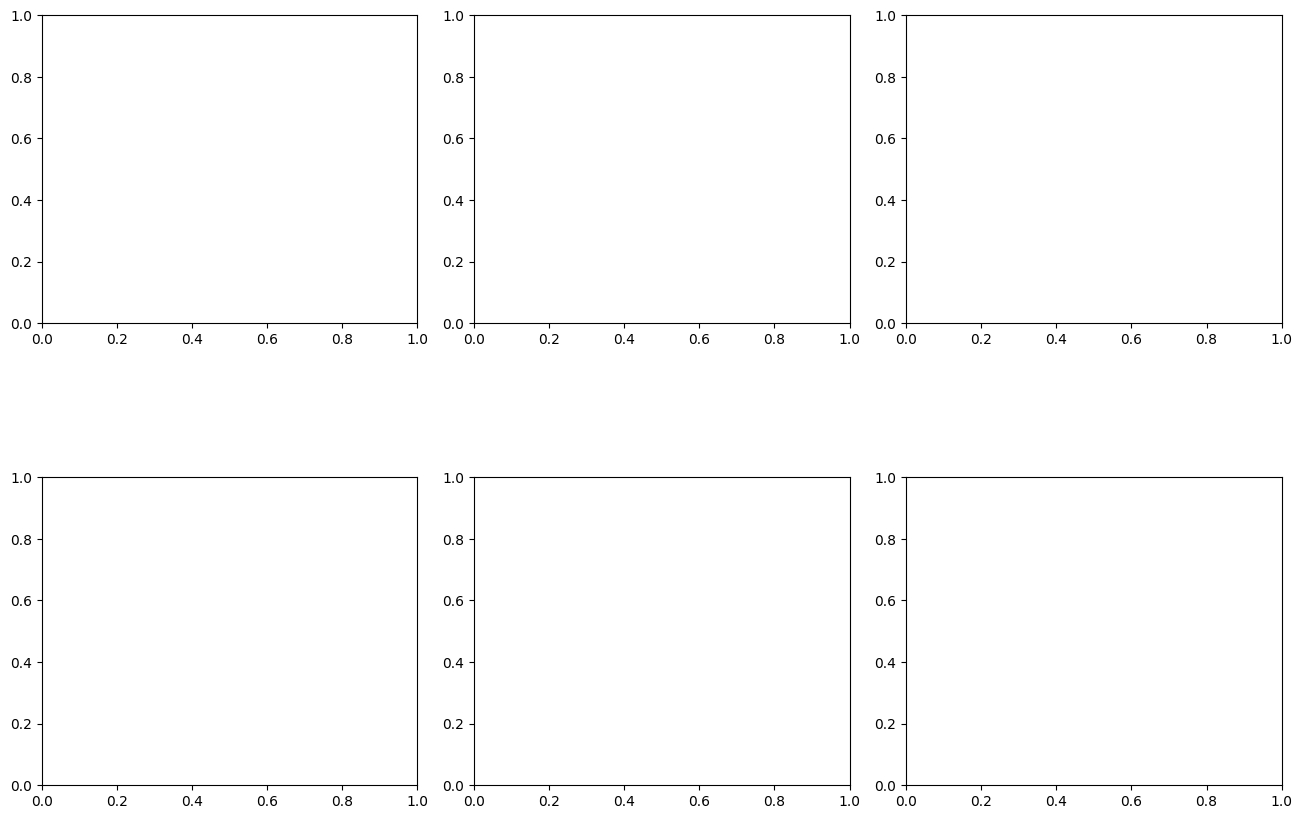

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (16,10))
fig.subplots_adjust(hspace= 0.5, wspace= 0.15)
ax[0,0].boxplot(x = df['Cargo_mensual'])
ax[0,0].set_title('Boxplot: Cargo mensual')

ax[0,1].boxplot(x = df['Cargos_totales'])
ax[0,1].set_title('Boxplot: Cargos totales')

ax[0,2].boxplot(x = df['Cargos_diarios'])
ax[0,2].set_title('Boxplot: Cargos diarios')



sns.histplot(data=df, x='Cargo_mensual', kde=True, binwidth=ancho_bin(df, 'Cargo_mensual'), ax=ax[1, 0])
ax[1,0].set_title('Diagrama de Densidad: Cargo Mensual')

sns.histplot(data= df, x = 'Cargos_totales',kde= True, binwidth= ancho_bin(df,'Cargos_totales'), ax = ax[1,1])
ax[1,1].set_title('Diagrama de Densidad: Cargos totales')

sns.histplot(data= df, x = 'Cargos_diarios',kde= True, binwidth= ancho_bin(df,'Cargos_diarios'), ax = ax[1,2])
ax[1,2].set_title('Diagrama de Densidad: Cargos diarios')


plt.show()

In [ ]:
df.columns

In [ ]:
fig, ax = plt.subplots(2,2, figsize = (16,10))
fig.subplots_adjust(hspace= 0.5, wspace= 0.15)


ax[0,0].boxplot(x = df['Total_servicios'])
ax[0,0].set_title('Boxplot: Total de servicios contratados')

ax[0,1].boxplot(x = df['Meses_contrato'])
ax[0,1].set_title('Boxplot: Meses de Contrato')


sns.histplot(data=df, x='Total_servicios', kde=True, binwidth=ancho_bin(df, 'Total_servicios'), ax=ax[1, 0])
ax[1,0].set_title('Diagrama de Densidad: Total de servicios contratados')

sns.histplot(data= df, x = 'Meses_contrato',kde= True, binwidth= ancho_bin(df,'Meses_contrato'), ax = ax[1,1])
ax[1,1].set_title('Diagrama de Densidad: Meses de Contrato')
plt.show()

In [ ]:
df.columns

## Analisis de correlación

In [ ]:
df_num = df[['Meses_contrato','Cargo_mensual','Cargos_totales','Cargos_diarios','Total_servicios', 'Abandono']]

# Calculate the correlation matrix
corr = df_num.corr()

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
ax.set_title('Correlación de variables numéricas')




# Mostrar el mapa de calor (heatmap)
plt.show()

In [ ]:
df_contrato_abandono = df[['Meses_contrato', 'Abandono']]

px.box(data_frame= df_contrato_abandono, x = 'Meses_contrato', color= 'Abandono', title= ' Distribución de los meses de contrato con la variable respuesta')

In [ ]:
df_cargo_mensual_abandono = df[['Cargo_mensual', 'Abandono']]

px.box(data_frame= df_cargo_mensual_abandono, x = 'Cargo_mensual', color= 'Abandono',
       title= 'Distribución del cargo mensual con la variable respuesta')

In [ ]:
df_cargos_diarios_abandono = df[['Cargos_diarios', 'Abandono']]

px.box(data_frame= df_cargos_diarios_abandono, x = 'Cargos_diarios', color= 'Abandono',
       title= 'Distribución de los cargos diarios con la variable respuesta')

In [ ]:
df_cargos_totales_abandono = df[['Cargos_totales', 'Abandono']]

px.box(data_frame= df_cargos_totales_abandono, x = 'Cargos_totales', color= 'Abandono',
       title= 'Distribución de los cargos totales con la variable respuesta')

In [ ]:
df_servicios_abandono = df[['Total_servicios', 'Abandono']]

px.box(data_frame= df_servicios_abandono, x = 'Total_servicios', color= 'Abandono', title = 'Distribución del total de servicios con la variable respuesta')

Las variables númericas mostrarón tener una relación baja con la variable objetivo "Abandono", en particula la variable ``Total_servicios`` de igual forma esta variable mostro tener una alta relación con el resto de variables numéricas, por lo que se decidió eliminarla del análisis. Por otro lado las variables ``Cargo_mensual`` y ``Cargos_diarios`` mostarón tener una relación perfecta entre ellas, esto se debe a que la variable ``Cargos_diarios`` es el resultado de dividir la variable ``Cargo_mensual`` entre 30, por lo que se decidió eliminar la variable ``Cargos_diarios`` del análisis.

In [ ]:
df.drop(columns= ['Cargos_diarios', 'Total_servicios'], inplace= True)
df.columns

## Distribución de las variable respuesta

In [ ]:
df.value_counts('Abandono', normalize=True).round(2)*100

In [ ]:
colores = {0: "#4CAF50", 1: "#F44336"}  # Verde y rojo

g = sns.countplot(
    data=df,
    x='Abandono',
    hue='Abandono',
    palette=colores
)

# Título y ejes
g.set_title('Distribución de la variable respuesta', y=1.05, fontsize=14)
g.set(xlabel='Abandono (0 = No, 1 = Sí)', ylabel='Cantidad')


total = len(df)
# Añadir etiquetas de datos sobre las barras
for p in g.patches:
    height = p.get_height()
    if height > 0:
        porcentaje = height / total * 100
        g.annotate(
            f'{int(round(porcentaje))}%',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=10
        )

# Mejorar la leyenda
g.legend_.set_title("Abandono")
g.set_xticklabels(['No abandonó', 'Sí abandonó'])

plt.tight_layout()
plt.show()

Podemos identificar que la variable respuesta ``Abandono`` tiene una distribución muy desbalanceada, ya que el 73% de los clientes no han abandonado la empresa, mientras que el 27% si lo ha hecho. Esto puede ser un problema para los modelos de clasificación, ya que pueden tener una tendencia a predecir más la clase mayoritaria. Por lo tanto se aplicará una técnica de balanceo de clases para mejorar el rendimiento del modelo.

Particularmente, se utilizará la técnica de sobremuestreo, especificamente la técnica de SMOTE (Synthetic Minority Over-sampling Technique).

# Preparación de los datos

In [ ]:
df.columns

Index(['Cancelacion', 'Género', 'Jubilado', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Multiples_lineas', 'DSL',
       'Fibra_optica', 'Seguridad_Ol', 'Backup_Ol', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas',
       'Facturacion_electronica', 'Contrato_Mensual', 'Contrato_Anual',
       'Contrato_Bianual', 'Pago_Trf.Bancaria_Auto', 'Pago_TCredito_Auto',
       'Pago_ChequeElectronico', 'Pago_ChequePorCorreo', 'Cuentas_mensuales',
       'Cuentas_totales', 'Cuentas_diarias', 'Género_txt', 'Dependientes_txt',
       'Cancelacion_txt'],
      dtype='object')

## Normalización de las variables numéricas

In [ ]:
X = df.drop(columns= 'Cancelacion')
y = df['Cancelacion']

In [ ]:
normalizador = MinMaxScaler()
columnas_a_normalizar = ['Cuentas_mensuales', 'Cuentas_totales']
X[columnas_a_normalizar] = normalizador.fit_transform(X[columnas_a_normalizar])


In [ ]:
df.columns

Index(['Cancelacion', 'Género', 'Jubilado', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Multiples_lineas', 'DSL',
       'Fibra_optica', 'Seguridad_Ol', 'Backup_Ol', 'Proteccion_dispositivo',
       'Soporte_tecnico', 'Streaming_TV', 'Streaming_peliculas',
       'Facturacion_electronica', 'Contrato_Mensual', 'Contrato_Anual',
       'Contrato_Bianual', 'Pago_Trf.Bancaria_Auto', 'Pago_TCredito_Auto',
       'Pago_ChequeElectronico', 'Pago_ChequePorCorreo', 'Cuentas_mensuales',
       'Cuentas_totales', 'Cuentas_diarias', 'Género_txt', 'Dependientes_txt',
       'Cancelacion_txt'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Género                   7256 non-null   int64  
 1   Jubilado                 7256 non-null   int64  
 2   Pareja                   7256 non-null   int64  
 3   Dependientes             7256 non-null   int64  
 4   Meses_contrato           7256 non-null   int64  
 5   Servicio_telefonico      7256 non-null   int64  
 6   Multiples_lineas         7256 non-null   int64  
 7   DSL                      7256 non-null   int64  
 8   Fibra_optica             7256 non-null   int64  
 9   Seguridad_Ol             7256 non-null   int64  
 10  Backup_Ol                7256 non-null   int64  
 11  Proteccion_dispositivo   7256 non-null   int64  
 12  Soporte_tecnico          7256 non-null   int64  
 13  Streaming_TV             7256 non-null   int64  
 14  Streaming_peliculas     

## Variables categóricas

In [ ]:
columnas_cat = list(X.select_dtypes(include='object').columns)

one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary', dtype= np.int64), columnas_cat),
                                  remainder= 'passthrough', sparse_threshold=0)


X_codificada = one_hot.fit_transform(X)
X_df = pd.DataFrame(X_codificada,columns=one_hot.get_feature_names_out())

In [ ]:
X_df

,onehotencoder__Género_txt_Mujer,onehotencoder__Dependientes_txt_Sin dependientes,onehotencoder__Cancelacion_txt_Sí,remainder__Género,remainder__Jubilado,remainder__Pareja,remainder__Dependientes,remainder__Meses_contrato,remainder__Servicio_telefonico,remainder__Multiples_lineas,...,remainder__Contrato_Mensual,remainder__Contrato_Anual,remainder__Contrato_Bianual,remainder__Pago_Trf.Bancaria_Auto,remainder__Pago_TCredito_Auto,remainder__Pago_ChequeElectronico,remainder__Pago_ChequePorCorreo,remainder__Cuentas_mensuales,remainder__Cuentas_totales,remainder__Cuentas_diarias
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.471144,0.066294,2.186667
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.414428,0.060420,1.996667
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.553731,0.030239,2.463333
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,13.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.793532,0.140670,3.266667
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.653234,0.028687,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.367164,0.083556,1.838333
7252,0.0,1.0,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.665174,0.214043,2.836667
7253,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533,1.676667
7254,0.0,0.0,0.0,0.0,0.0,1.0,1.0,67.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.493532,0.531831,2.261667


## Selección de variables

In [ ]:
def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_resultados = calcular_vif(X_df)
display(vif_resultados[vif_resultados['VIF'] > 5])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,onehotencoder__Género_txt_Mujer,inf
1,onehotencoder__Dependientes_txt_Sin dependientes,inf
3,remainder__Género,inf
6,remainder__Dependientes,inf
28,remainder__Cuentas_diarias,inf
21,remainder__Contrato_Bianual,inf
22,remainder__Pago_Trf.Bancaria_Auto,inf
23,remainder__Pago_TCredito_Auto,inf
24,remainder__Pago_ChequeElectronico,inf
25,remainder__Pago_ChequePorCorreo,inf


In [ ]:
X_df.columns

Index(['onehotencoder__Género_txt_Mujer',
       'onehotencoder__Dependientes_txt_Sin dependientes',
       'onehotencoder__Cancelacion_txt_Sí', 'remainder__Género',
       'remainder__Jubilado', 'remainder__Pareja', 'remainder__Dependientes',
       'remainder__Meses_contrato', 'remainder__Servicio_telefonico',
       'remainder__Multiples_lineas', 'remainder__DSL',
       'remainder__Fibra_optica', 'remainder__Seguridad_Ol',
       'remainder__Backup_Ol', 'remainder__Proteccion_dispositivo',
       'remainder__Soporte_tecnico', 'remainder__Streaming_TV',
       'remainder__Streaming_peliculas', 'remainder__Facturacion_electronica',
       'remainder__Contrato_Mensual', 'remainder__Contrato_Anual',
       'remainder__Contrato_Bianual', 'remainder__Pago_Trf.Bancaria_Auto',
       'remainder__Pago_TCredito_Auto', 'remainder__Pago_ChequeElectronico',
       'remainder__Pago_ChequePorCorreo', 'remainder__Cuentas_mensuales',
       'remainder__Cuentas_totales', 'remainder__Cuentas_diarias'

In [ ]:
X_df.drop(columns = ['remainder__Cuentas_mensuales', 'remainder__Contrato_Mensual', 'remainder__Pago_ChequePorCorreo', 'remainder__Cuentas_totales'], inplace= True)

In [ ]:
vif_resultados = calcular_vif(X_df)
display(vif_resultados[vif_resultados['VIF'] > 5])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
0,onehotencoder__Género_txt_Mujer,inf
3,remainder__Género,inf
24,remainder__Cuentas_diarias,870.136978
11,remainder__Fibra_optica,595.541370
10,remainder__DSL,139.103549
8,remainder__Servicio_telefonico,35.205519
17,remainder__Streaming_peliculas,24.250046
16,remainder__Streaming_TV,24.147662
1,onehotencoder__Dependientes_txt_Sin dependientes,18.940849
6,remainder__Dependientes,9.120072


# Modelado predictivo

### Separación de variables explicativas y variable respuesta

In [ ]:
# 70% entrenamiento, 15% test y 15% validación
X_train, X_temp, y_train, y_temp = train_test_split(X_df, y, test_size=0.30, stratify=y, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=5)

## Normalizacion de variable respuesta

In [ ]:
oversampling = SMOTE(random_state= 5)
X_train_balanceada, y_train_balanceada = oversampling.fit_resample(X_train,y_train)

In [ ]:
def evaluacion_modelos(y_real, y_pred):
    print(f'Exactitud: {round(accuracy_score(y_real, y_pred), 3)}')
    print(f'Precisión: {round(precision_score(y_real, y_pred, zero_division=0), 3)}')
    print(f'Recall: {round(recall_score(y_real, y_pred, zero_division=0), 3)}')
    print(f'F1 Score: {round(f1_score(y_real, y_pred, zero_division=0), 3)}')
    matriz_confusion_modelo = confusion_matrix(y_real, y_pred)
    visualizacion_matriz_confusion = ConfusionMatrixDisplay(matriz_confusion_modelo, display_labels=['No Abandono', 'Abandono'])
    visualizacion_matriz_confusion.plot();


Exactitud: 0.5
Precisión: 0.5
Recall: 0.2
F1 Score: 0.286


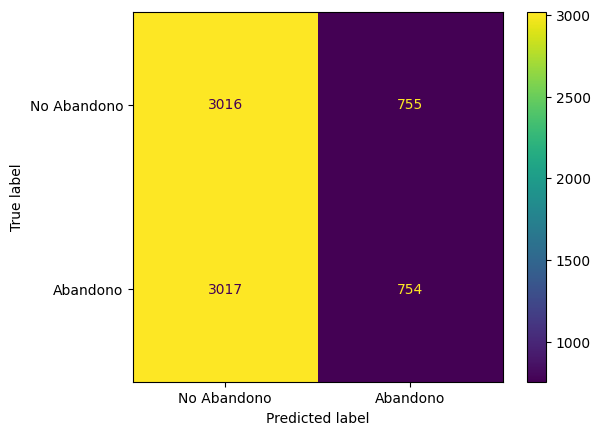

In [ ]:
modelo_dummy = DummyClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
y_predict_cv_dummy = cross_val_predict(modelo_dummy, X_train_balanceada, y_train_balanceada, cv = skf)
evaluacion_modelos(y_train_balanceada,y_predict_cv_dummy)

Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


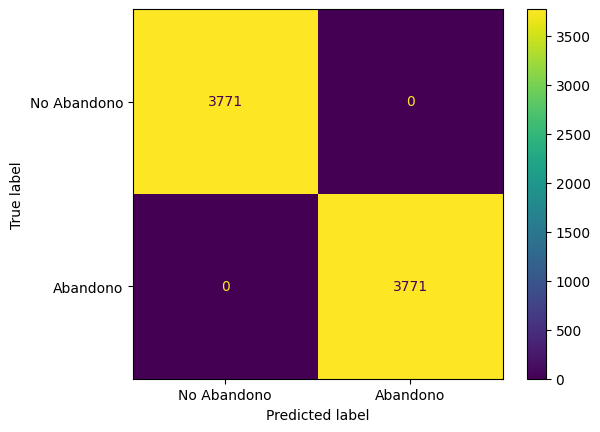

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state= 5)
y_pred_cv_arbol = cross_val_predict(modelo_arbol,X_train_balanceada,y_train_balanceada, cv = skf)
resultados_arbol = evaluacion_modelos(y_train_balanceada,y_pred_cv_arbol)


Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


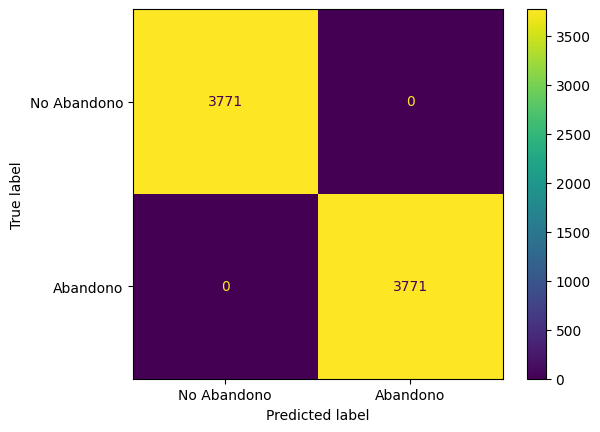

In [ ]:
modelo_rf = RandomForestClassifier(random_state= 5)
y_pred_cv_rf = cross_val_predict(modelo_rf, X_train_balanceada, y_train_balanceada, cv = skf)

resultados_random = evaluacion_modelos(y_train_balanceada,y_pred_cv_rf)


Exactitud: 0.907
Precisión: 0.857
Recall: 0.977
F1 Score: 0.913


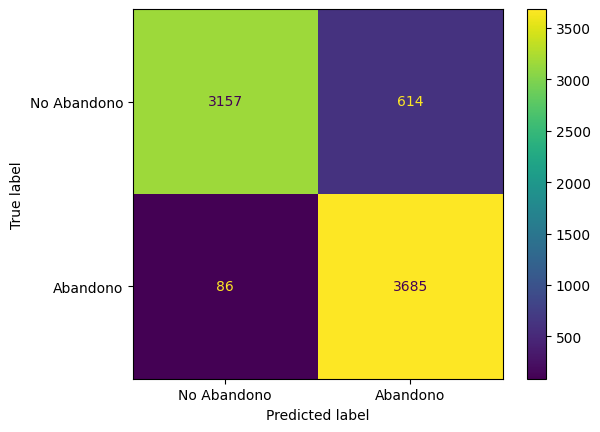

In [ ]:
modelo_knn = KNeighborsClassifier()
y_pred_cv_knn = cross_val_predict(modelo_knn, X_train_balanceada, y_train_balanceada, cv = skf)

resultados_knn = evaluacion_modelos(y_train_balanceada,y_pred_cv_knn)

In [ ]:
modelo_arbol.fit(X_train_balanceada,y_train_balanceada)
y_pred_arbol = modelo_arbol.predict(X_val)

modelo_rf.fit(X_train_balanceada,y_train_balanceada)
y_pred_rf = modelo_rf.predict(X_val)

modelo_knn.fit(X_train_balanceada,y_train_balanceada)
y_pred_knn = modelo_knn.predict(X_val)

modelos = {
    'Árbol de Decisión': y_pred_arbol,
    'Random Forest': y_pred_rf,
    'KNN': y_pred_knn,
}

# Creamos la tabla
resultados = []

for nombre, pred in modelos.items():
    acc = accuracy_score(y_val, pred)
    prec = precision_score(y_val, pred)
    rec = recall_score(y_val, pred)
    f1 = f1_score(y_val, pred)

    resultados.append({
        'Modelo': nombre,
        'Exactitud': round(acc, 3),
        'Precisión': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

tabla_resultados = pd.DataFrame(resultados)

# Mostrar la tabla ordenada por F1 Score
tabla_resultados.sort_values(by='Recall', ascending=False, inplace=True)
display(tabla_resultados)

,Modelo,Exactitud,Precisión,Recall,F1 Score
0,Árbol de Decisión,1.000,1.000,1.000,1.000
1,Random Forest,1.000,1.000,1.000,1.000
2,KNN,0.863,0.674,0.907,0.773


## Optimización de hiperparámetros
En este caso se decidió optimizar los hiperparámetros de los modelos utilizando la métrica de ``Recall``, ya que el objetivo principal es identificar correctamente a los clientes que abandonan la empresa, minimizando los falsos negativos.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


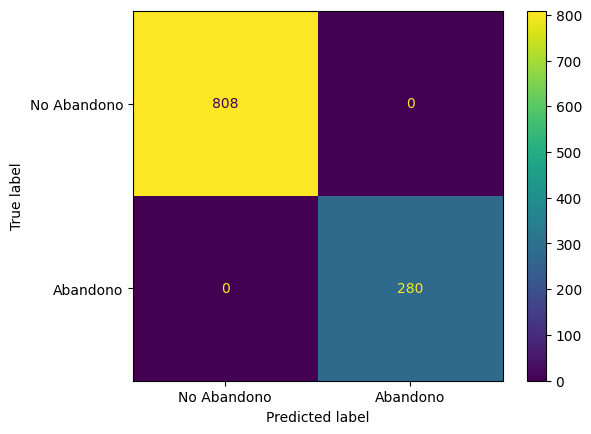

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

arbol = DecisionTreeClassifier(random_state=5)

grid_search = GridSearchCV(
    estimator=arbol,
    param_grid=param_grid,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_balanceada, y_train_balanceada)

best_tree = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred_best_tree = best_tree.predict(X_val)
resultados_best_tree = evaluacion_modelos(y_val, y_pred_best_tree)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


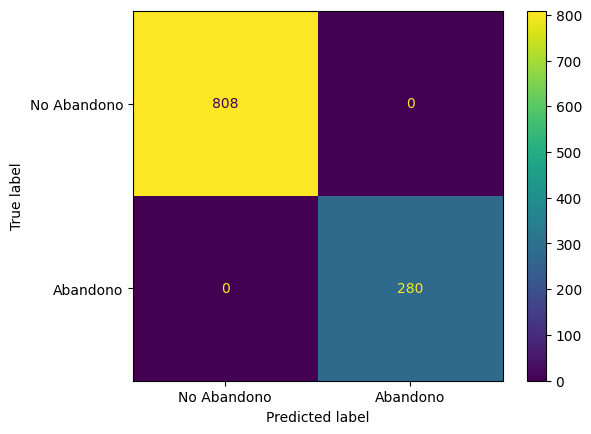

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=5),
    param_grid=param_grid_rf,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_balanceada, y_train_balanceada)

best_rf = grid_search_rf.best_estimator_
print("Mejores hiperparámetros:", grid_search_rf.best_params_)

y_pred_best_rf = best_rf.predict(X_val)
evaluacion_modelos(y_val, y_pred_best_rf)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Exactitud: 0.88
Precisión: 0.71
Recall: 0.9
F1 Score: 0.794


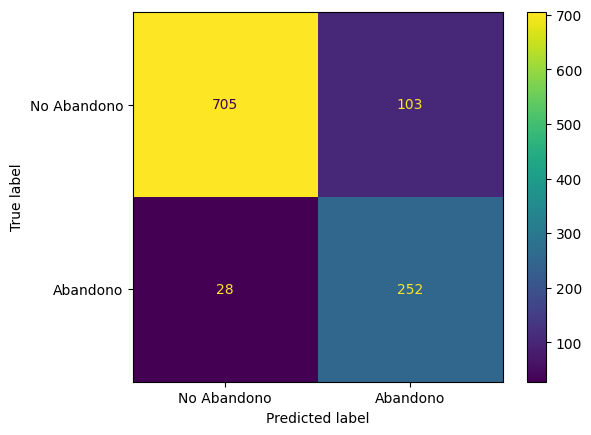

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=skf,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(X_train_balanceada, y_train_balanceada)

best_knn = grid_search_knn.best_estimator_
print("Mejores hiperparámetros:", grid_search_knn.best_params_)

y_pred_best_knn = best_knn.predict(X_val)
evaluacion_modelos(y_val, y_pred_best_knn)

# Resultados con datos de prueba y modelos con hiperparámetros

In [ ]:
y_pred_best_tree_test = best_tree.predict(X_test)
y_pred_best_rf_test = best_rf.predict(X_test)
y_pred_best_knn_test = best_knn.predict(X_test)

modelos = {
    'Árbol de decisiones con hiperparámetros': y_pred_best_tree_test,
    'Random Forest con hiperparámetros': y_pred_best_rf_test,
    'KNN con hiperparámetros': y_pred_best_knn_test,
}

# Creamos la tabla
resultados = []

for nombre, pred in modelos.items():
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    resultados.append({
        'Modelo': nombre,
        'Exactitud': round(acc, 3),
        'Precisión': round(prec, 3),
        'Recall': round(rec, 3),
        'F1 Score': round(f1, 3)
    })

tabla_resultados = pd.DataFrame(resultados)

tabla_resultados.sort_values(by='Recall', ascending=False, inplace=True)
display(tabla_resultados)

,Modelo,Exactitud,Precisión,Recall,F1 Score
0,Árbol de decisiones con hiperparámetros,1.000,1.000,1.000,1.000
1,Random Forest con hiperparámetros,1.000,1.000,1.000,1.000
2,KNN con hiperparámetros,0.871,0.688,0.911,0.784


Tomando en cuenta los resultados de los modelos podemos concluir que el mejor modelo es el de ***Random Forest***, debido a que tiene la mayor exactitud, precisión y F1-score, al probarlo con el conjunto de datos de prueba. Sin embargo el modelo de **KNN** mostró un buen rendimientoe e incluso un mejor nivel en el **Recall**, vamos a revisar detalladamente ambos modelos.

## Resultados detallados de los modelos Random Forest y Decision Tree

In [ ]:
print(classification_report(y_test,y_pred_best_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      1.00      1.00       281

    accuracy                           1.00      1089
   macro avg       1.00      1.00      1.00      1089
weighted avg       1.00      1.00      1.00      1089



Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


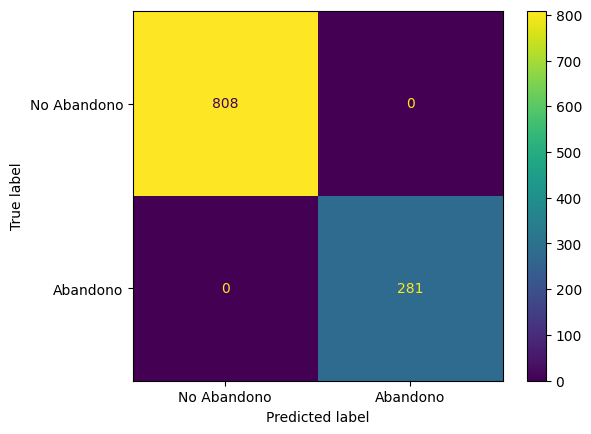

In [ ]:
resultados_best_rf = evaluacion_modelos(y_test, y_pred_best_rf_test)

In [ ]:
print(classification_report(y_test,y_pred_best_tree_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       1.00      1.00      1.00       281

    accuracy                           1.00      1089
   macro avg       1.00      1.00      1.00      1089
weighted avg       1.00      1.00      1.00      1089



Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


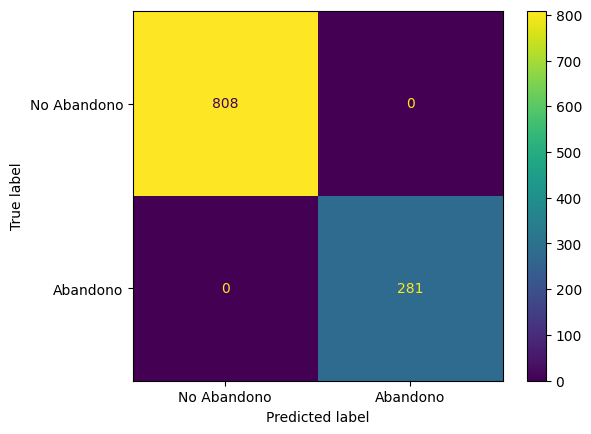

In [ ]:
resultados_best_arbol = evaluacion_modelos(y_test, y_pred_best_tree_test)

Se puede notar que el modelo de **Random Forest** muestra un mejor desempeño general en la mayoría de las métricas evaluadas. No obstante, el **Decision Tree** supera a Random Forest en **Recall**, lo cual es relevante si el objetivo principal de la empresa es minimizar los falsos negativos, es decir, identificar correctamente a los clientes que probablemente cancelen el servicio.

En este caso, el **Decision Tree** sería una opción viable. Por otro lado, si se busca un modelo con un rendimiento más equilibrado en todas las métricas, el **Random Forest** se presenta como la mejor alternativa.

# Importancia de las variables

In [ ]:
importancia = best_tree.feature_importances_
df_feature_importance = pd.DataFrame({'Variable': X_df.columns, 'Importancia':(importancia*100).round(2)}).sort_values('Importancia', ascending= False)
df_feature_importance = df_feature_importance[df_feature_importance['Importancia'] > 0]


In [ ]:
df_feature_importance

,Variable,Importancia
2,onehotencoder__Cancelacion_txt_Sí,100.0


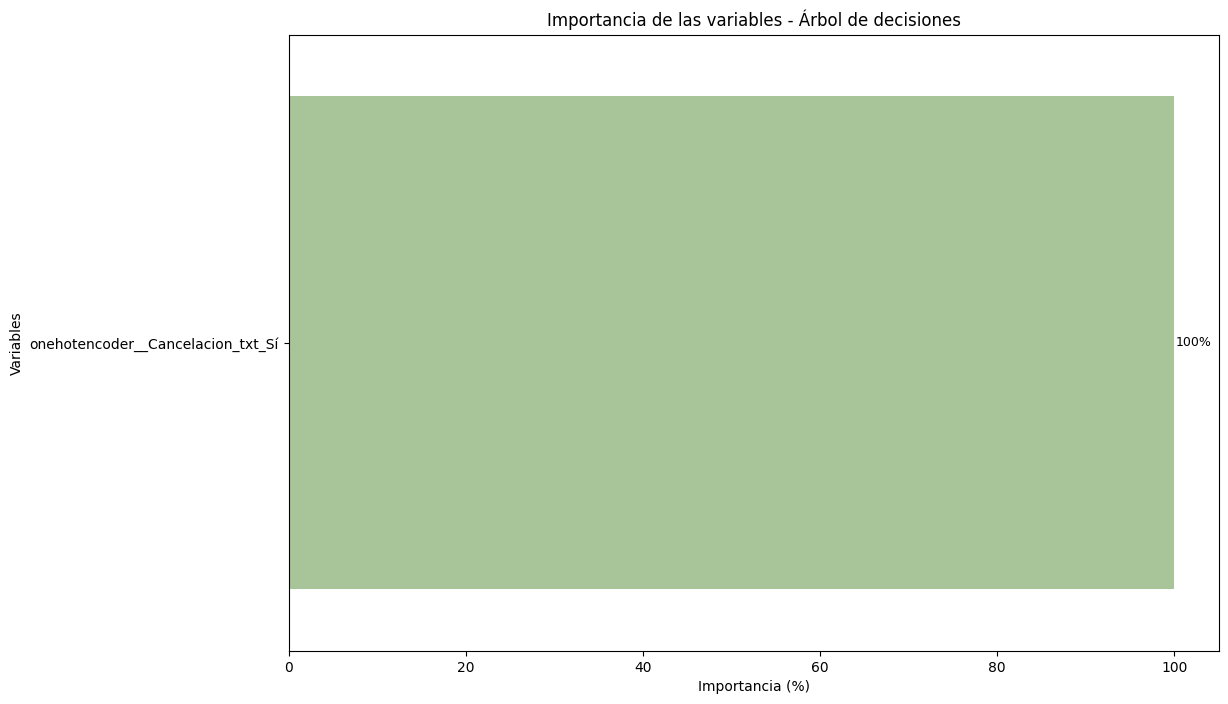

In [ ]:
plt.figure(figsize=(12,8))
bars = sns.barplot(
    data=df_feature_importance,
    y='Variable',
    x='Importancia',
    hue='Importancia',
    palette='crest',
    dodge=False, legend= False
)
bars.set(xlabel='Importancia (%)', ylabel='Variables')
plt.title('Importancia de las variables - Árbol de decisiones')

for i, v in enumerate(df_feature_importance['Importancia']):
    bars.text(
        v + 0.2,
        i,
        f'{int(round(v))}%',
        color='black',
        va='center',
        fontsize=9
    )

plt.show()

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
columnas_cat = list(X.select_dtypes(include='object').columns)



preprocesador = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop= 'if_binary', dtype= np.int64), columnas_cat)
], remainder= 'passthrough', sparse_threshold=0 )

pipeline = imbpipeline(steps=[
    ('Preprocesamiento', preprocesador),
    ('Oversample', SMOTE(random_state=5)),
    ('Modelo_Arbol_Hiperparámetros', best_tree)
    ])

# Pipeline

Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1 Score: 1.0


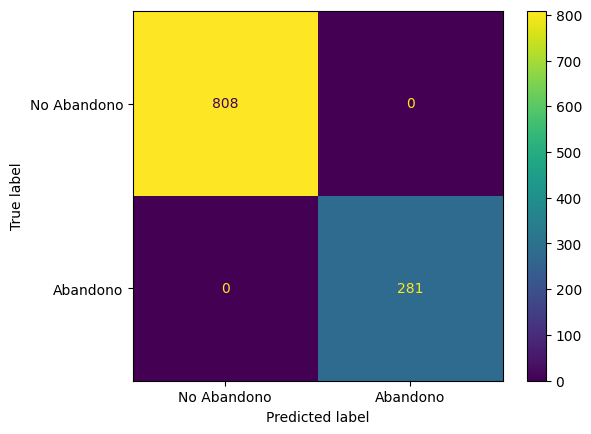

In [ ]:
pipeline.fit(X.loc[X_train.index], y_train)
y_pred_pipeline = pipeline.predict(X.loc[X_test.index])
evaluacion_modelos(y_test, y_pred_pipeline)

# Guardar el modelo

In [ ]:
with open('best_tree_model.pkl', 'wb') as f:
    pickle.dump(best_tree, f)